In [40]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

using StaticArrays, DifferentialEquations, DynamicalSystems
sE, sI, rE, rI, Y  = -50..50, -50..50,  -50..50, -50..50, -50..50
box = sE × sI × rE × rI × Y
using CairoMakie, LinearAlgebra

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [41]:
function get_valus_vectors(fp)
    Jfp = rate_jac(fp, p, 0.0)
    Jfp_value_vectors = eigen(Jfp)
    Jfp_value = Jfp_value_vectors.values
    Jfp_vectors = Jfp_value_vectors.vectors
    return Jfp_value, Jfp_vectors
end

get_valus_vectors (generic function with 1 method)

In [42]:
0.7070707070707071 0.14646464646464646
[0.1592694277409673, 0.5692558879909888, 0.00024313311264429925, 0.07608583399156753, 1.5975600196964002e-19]
[-0.00022200636042222786, -0.19444913568371114, -0.41356343884029056, -0.8919327396610558, -Inf]

Base.Meta.ParseError: ParseError:
# Error @ /home/sergey/work/repo/dynamical-systems/brain rhythms/types of activity/find_fp_from_maps.ipynb:1:19
0.7070707070707071 0.3484848484848485
#                 └─────────────────┘ ── extra tokens after end of expression

In [109]:
τsE = 3.0; γE = 4.0; s0E = 0.15;
τsI = 10.0; γI = 8.0; s0I = 0.14646464646464646;
τrE = 2.0; kE = 5.0; IE = 0.9; wEE = 3.5; wIE = 5.0; θE = 0.2;
τrI = 6.0; kI = 5.0; II = 0.0; wEI = 5.0; wII = 3.0; θI = 0.4;
τY = 0.01;  βY = 0.01;
ythr = 0.5; sEthr = 0.5; kY = 0.01
γY = 0.7070707070707071;

In [110]:
time = 500.0; tt = 0.0; tstep = 0.001; tspan = (0.0, time)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [111]:
p = [τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, γY, ythr, sEthr, kY];
u0 = [0.1592694277409673, 0.5692558879909888, 0.00024313311264429925, 0.07608583399156753, 1.5975600196964002e-19]

ds = CoupledODEs(rate_model, u0, p, diffeq = integ_set);

In [112]:
fp, ei, _ = fixedpoints(ds, box, rate_jac);

In [113]:
fp

5-dimensional StateSpaceSet{Float64} with 1 points
 0.254538  0.460549  0.0276714  0.0727785  2.18642e-15

In [114]:
ei

1-element Vector{Vector{ComplexF64}}:
 [-100.0 + 0.0im, -0.9070861967638235 + 0.0im, -0.4775473759647795 + 0.0im, 0.08983321185233126 - 0.2936033156983015im, 0.08983321185233126 + 0.2936033156983015im]

In [115]:
traj, trange = trajectory(ds, 10000)

(5-dimensional StateSpaceSet{Float64} with 100001 points, 0.0:0.1:10000.0)

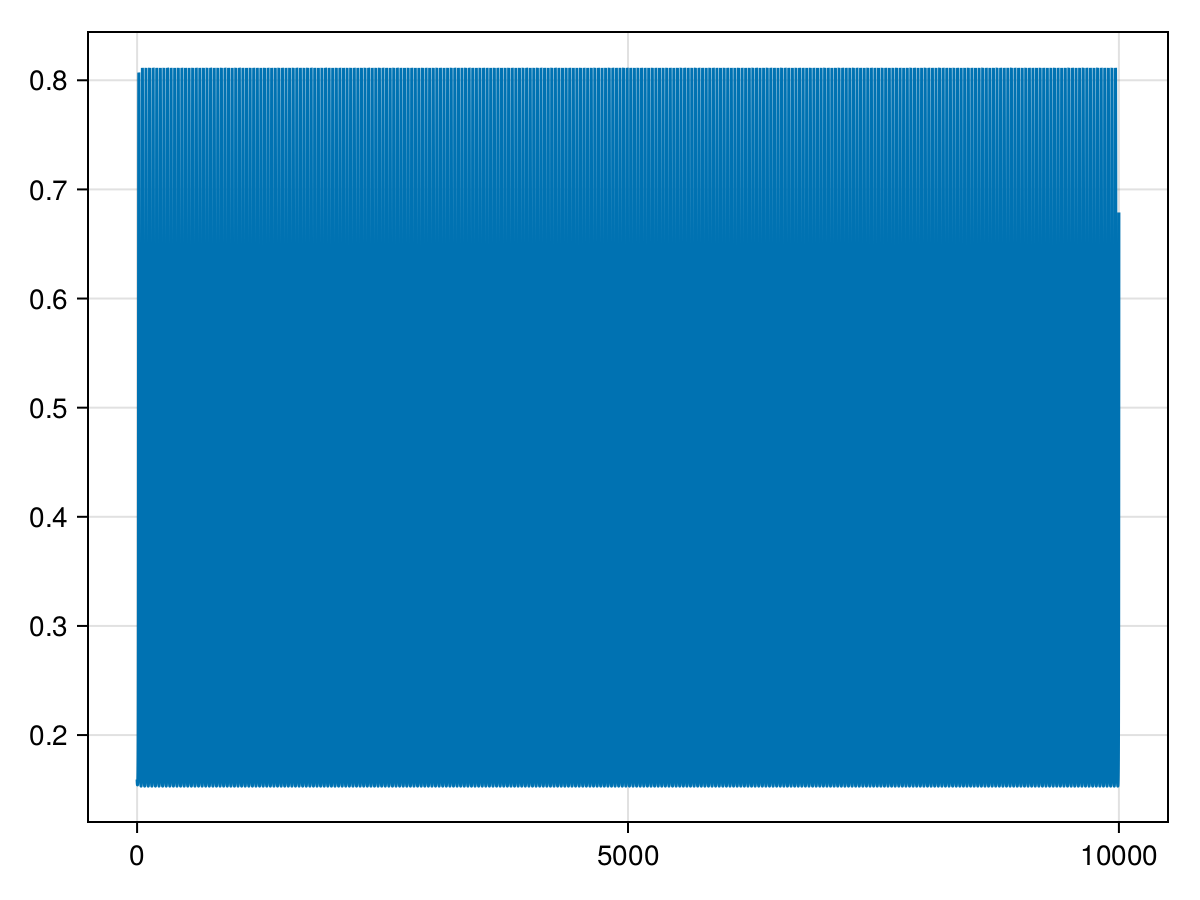

CairoMakie.Screen{IMAGE}


In [116]:
f = Figure()
ax = Axis(f[1, 1])
lines!(ax, trange, traj[:, 1])
display(f)

In [117]:
lyapunovspectrum(ds, 2000)

5-element Vector{Float64}:
  -0.0015790490974298503
  -0.19776129908736134
  -0.41324110216304344
  -0.8866769799645273
 -Inf